## Weather data Austin (2010)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

weather = pd.read_csv('weather_data_austin_2010.csv', parse_dates = True, index_col ="Date")
weather.shape

(8759, 3)

#### For smplicity, take only a subset of the data

In [37]:
weather_sub = weather.iloc[:744]
weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


### Plot data
#### Plot Temperature in Austin

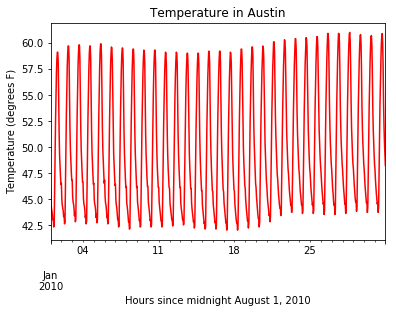

In [5]:
# Create a plot with color='red'

#Plot subset of the data
weather_sub['Temperature'].plot(color='red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

#### Plot all columns

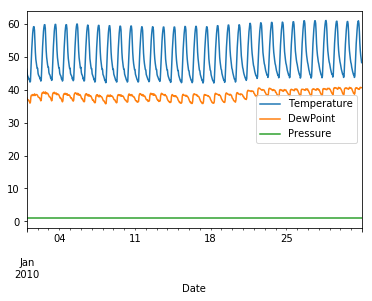

In [10]:
# Plot all columns (default)
weather_sub.plot()
plt.show()


#### Plot all columns as subplots

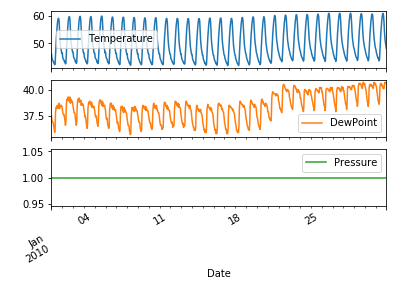

In [11]:
# Plot all columns as subplots
weather_sub.plot(subplots=True)

plt.show()

#### Plot one column only

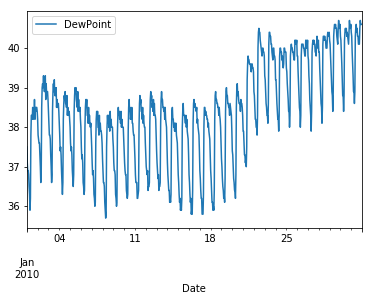

In [87]:
# Plot just the Dew Point data
column_list1 = ['DewPoint']
weather_sub[column_list1].plot()
plt.show()

#### Plot some columns

In [ ]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
weather_sub[column_list2].plot()
plt.show()

#### Plot the Temperature & Dew Point of the first 500 entries
- On the same axes

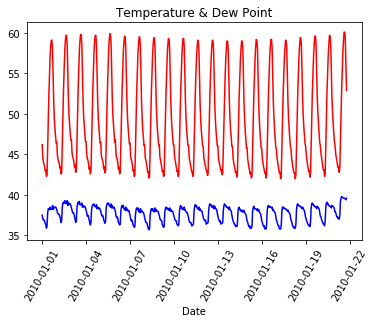

In [90]:
import matplotlib.pyplot as plt

plt.plot(weather_sub.index[0:500], weather_sub.Temperature[0:500], 'red')
plt.plot(weather_sub.index[0:500], weather_sub.DewPoint[0:500], 'blue') 
plt.xlabel('Date')
plt.title('Temperature & Dew Point')
plt.xticks(rotation=60)
plt.show() # Renders plot objects to screen

- Different axises

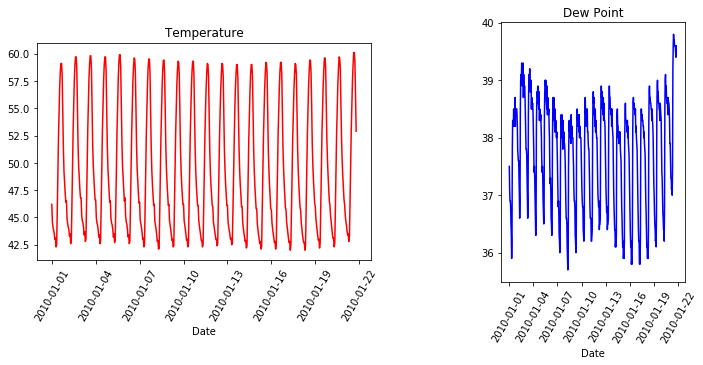

In [91]:

plt.plot(weather_sub.index[0:500], weather_sub.Temperature[0:500], 'red')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.title('Temperature')

plt.axes([1.2,0.05,0.425,0.9])
plt.plot(weather_sub.index[0:500], weather_sub.DewPoint[0:500], 'blue')
plt.xlabel('Date')
plt.title('Dew Point')
plt.xticks(rotation=60)
plt.show()

- Using subplot

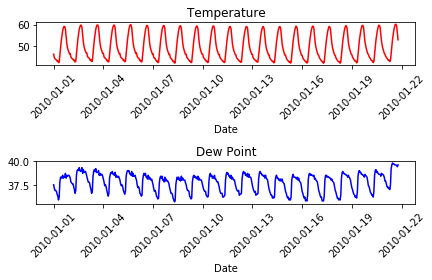

In [93]:
# (number of subplots, the number of column, the number of row)
plt.subplot(2, 1, 1) 
plt.plot(weather_sub.index[0:500], weather_sub.Temperature[0:500], 'red')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Temperature')


plt.subplot(2, 1, 2)
plt.plot(weather_sub.index[0:500], weather_sub.DewPoint[0:500], 'blue')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Dew Point')
plt.tight_layout()
plt.show()

#### Extracting data by index

In [13]:
ts0 = weather['Temperature']

# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']


#### Using reindex
- without fill method

In [27]:
# Reindex without fill method: ts3

# Reindex ts2 with the index of ts1 and save it in ts3
ts3 = ts2.reindex(ts1.index)
ts3

Date
2010-10-11 21:00:00   NaN
2010-10-11 22:00:00   NaN
Name: Temperature, dtype: float64

- with fill method

In [28]:
# Reindex with fill method, using forward fill: ts4
# fill farward means fill the NaN values with the previous defined values
ts4 = ts2.reindex(ts1.index, method='ffill')

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4

#### Resampling

In [9]:
# Downsample to 6 hour data and aggregate by mean: df1
weather1 = weather['Temperature'].resample('6h').mean()

# Downsample to daily data and count the number of data points: df2
weather2 = weather['Temperature'].resample('D').count()


In [10]:
# Extract temperature data for August: august
august = weather['Temperature'].loc['2010-08']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = weather['Temperature'].loc['2010-02']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()


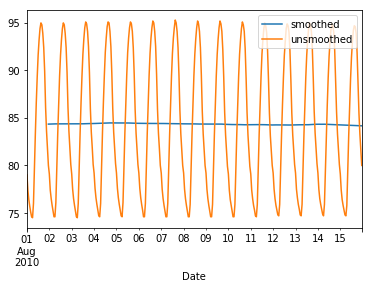

In [11]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = weather['Temperature']['2010-08-01':'2010-08-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

In [40]:
# Extract the August 2010 data: august
august = weather['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


#### Missing values and interpolation

In [46]:
ts1_index = daily_highs.loc['2010-08-01':'2010-08-10']
ts2_index = daily_highs.loc['2010-08-01':'2010-08-07']
ts1_index

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
Freq: D, Name: Temperature, dtype: float64

In [47]:
ts2_index

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
Freq: D, Name: Temperature, dtype: float64

In [43]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2_index.reindex(ts1_index.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1_index - ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

count    10.000000
mean      0.040000
std       0.069921
min       0.000000
25%       0.000000
50%       0.000000
75%       0.075000
max       0.200000
Name: Temperature, dtype: float64


In [45]:
differences

Date
2010-08-01    0.0
2010-08-02    0.0
2010-08-03    0.0
2010-08-04    0.0
2010-08-05    0.0
2010-08-06    0.0
2010-08-07    0.0
2010-08-08    0.1
2010-08-09    0.1
2010-08-10    0.2
Freq: D, Name: Temperature, dtype: float64

#### Plot some data
- Summer data
- One week data

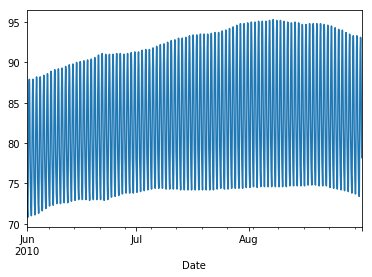

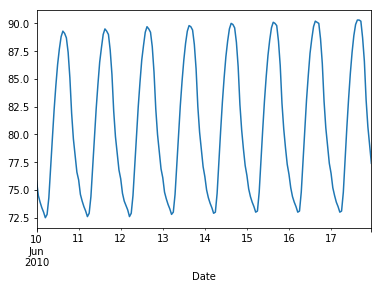

In [14]:
# Plot the summer data
weather.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
weather.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()


- One month data

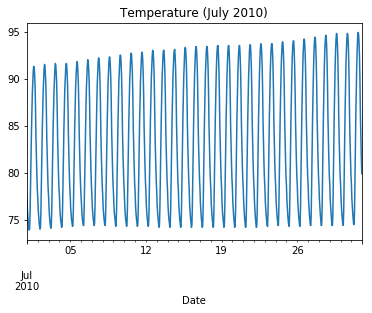

In [15]:
weather.Temperature['2010-07'].plot()
plt.title('Temperature (July 2010)')
plt.show()

- Dew Point distribution in 2010

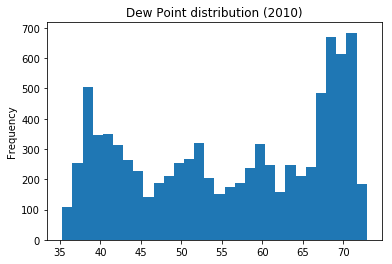

In [16]:
weather['DewPoint'].plot(kind= 'hist', bins=30)
plt.title('Dew Point distribution (2010)')
plt.show()

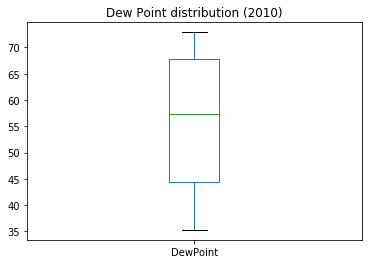

In [17]:
weather['DewPoint'].plot(kind='box')
plt.title('Dew Point distribution (2010)')
plt.show()

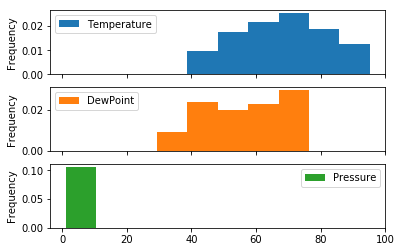

In [49]:
weather.plot(kind='hist', normed=True, subplots=True)
plt.show()

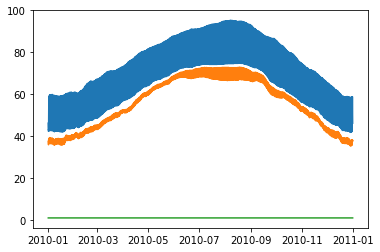

In [50]:
plt.plot(weather)
plt.show()

In [28]:
temperature = weather['Temperature']
march_apr = temperature['2010-03':'2010-04'] # data of March & April 2010 only
march_apr.shape

(1463,)

In [29]:
march_apr.iloc[-4:] #extract last 4 entries from time

Date
2010-04-30 20:00:00    73.3
2010-04-30 21:00:00    71.3
2010-04-30 22:00:00    69.7
2010-04-30 23:00:00    68.5
Name: Temperature, dtype: float64

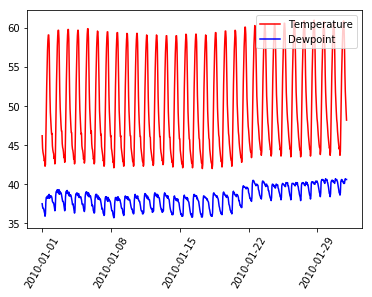

In [21]:
plt.plot(temperature['2010-01'], color='red', label='Temperature')
dewpoint = weather['DewPoint']
plt.plot(dewpoint['2010-01'], color='blue', label='Dewpoint')
plt.legend(loc='upper right')
plt.xticks(rotation=60)
plt.show()

#### Formatting plot

In [22]:
jan = temperature['2010-01']
dates = jan.index[::96]  # Pick every 4th day
print(dates)

DatetimeIndex(['2010-01-01', '2010-01-05', '2010-01-09', '2010-01-13',
               '2010-01-17', '2010-01-21', '2010-01-25', '2010-01-29'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [24]:
labels = dates.strftime('%b %d') # Make formatted labels
print(labels)

['Jan 01' 'Jan 05' 'Jan 09' 'Jan 13' 'Jan 17' 'Jan 21' 'Jan 25' 'Jan 29']


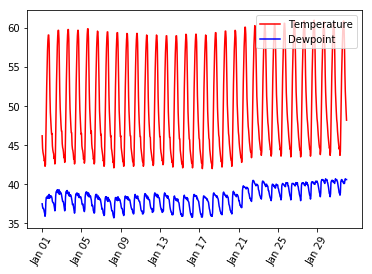

In [25]:
plt.plot(temperature['2010-01'], color='red', label='Temperature')
plt.plot(dewpoint['2010-01'], color='blue', label='Dewpoint')
plt.xticks(dates, labels, rotation=60)
plt.legend(loc='upper right')
plt.show()

In [52]:
smoothed = weather[['Temperature']].resample('D').mean()
smoothed['14d'] = smoothed['Temperature'].resample('D').mean().rolling(window=14).mean()
smoothed['7d'] = smoothed['Temperature'].resample('D').mean().rolling(window=7).mean()
smoothed['3d'] = smoothed['Temperature'].resample('D').mean().rolling(window=3).mean()
smoothed['1d'] = smoothed['Temperature'].resample('D').mean().rolling(window=1).mean()

smoothed.head()


,Temperature,14d,7d,3d,1d
Date,,,,,
2010-01-01,49.337500,NaN,NaN,NaN,49.337500
2010-01-02,49.795833,NaN,NaN,NaN,49.795833
2010-01-03,49.900000,NaN,NaN,49.677778,49.900000
2010-01-04,49.729167,NaN,NaN,49.808333,49.729167
2010-01-05,49.841667,NaN,NaN,49.823611,49.841667


In [53]:
smoothed.info()
print(smoothed.iloc[:3,:]) # first 3 rows, all columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 5 columns):
Temperature    365 non-null float64
14d            352 non-null float64
7d             359 non-null float64
3d             363 non-null float64
1d             365 non-null float64
dtypes: float64(5)
memory usage: 17.1 KB
            Temperature  14d  7d         3d         1d
Date                                                  
2010-01-01    49.337500  NaN NaN        NaN  49.337500
2010-01-02    49.795833  NaN NaN        NaN  49.795833
2010-01-03    49.900000  NaN NaN  49.677778  49.900000


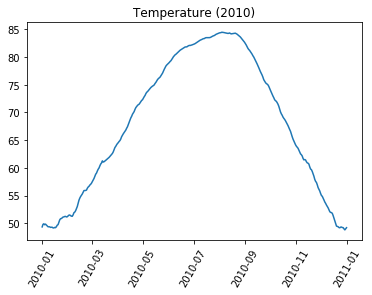

In [54]:
plt.plot(smoothed['1d']) # moving average over 24 hours
plt.title('Temperature (2010)')
plt.xticks(rotation=60)
plt.show()

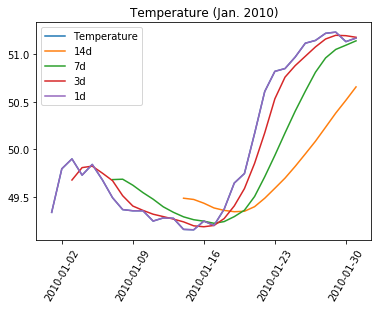

In [55]:
plt.plot(smoothed['2010-01']) # plot DataFrame for January
plt.legend(smoothed.columns)
plt.title('Temperature (Jan. 2010)')
plt.xticks(rotation=60)
plt.show()

In [59]:
smoothed['2010-01'].shape

(31, 5)

In [82]:
variances = weather[['Temperature']].resample('D').mean()
variances['14d'] = weather['Temperature'].resample('D').mean().rolling(window=14).std()
variances['7d'] = weather['Temperature'].resample('D').mean().rolling(window=7).std()
variances['3d'] = weather['Temperature'].resample('D').mean().rolling(window=3).std()
variances['1d'] = weather['Temperature'].resample('D').std()

In [83]:
variances

,Temperature,14d,7d,3d,1d
Date,,,,,
2010-01-01,49.337500,NaN,NaN,NaN,5.916948
2010-01-02,49.795833,NaN,NaN,NaN,6.032555
2010-01-03,49.900000,NaN,NaN,0.299256,5.986724
2010-01-04,49.729167,NaN,NaN,0.086100,6.015088
2010-01-05,49.841667,NaN,NaN,0.086836,6.083042
2010-01-06,49.679167,NaN,NaN,0.083229,5.948254
2010-01-07,49.491667,NaN,0.201294,0.175149,6.049500
2010-01-08,49.366667,NaN,0.193106,0.157288,6.069429
2010-01-09,49.354167,NaN,0.221433,0.076035,5.984326


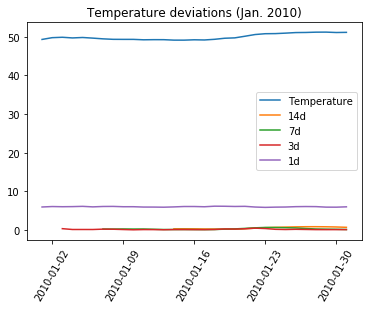

In [84]:
plt.plot(variances['2010-01'])
plt.legend(variances.columns)
plt.title('Temperature deviations (Jan. 2010)')
plt.xticks(rotation=60)
plt.show()